In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import wget
import pandas as pd
import numpy as np

In [4]:
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch05/winequality-white.csv'
wget.download(url,'wine_data.csv')

100% [........................................................] 264426 / 264426

'wine_data.csv'

In [10]:
dataset = pd.read_csv('wine_data.csv',sep=';')
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [12]:
X = dataset.drop('quality',axis=1)
y = dataset['quality']

In [13]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.15)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.05)

## Lets scale our data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_new= scaler.fit_transform(x_train)

Text(0.5, 1.0, 'Standardize Training dataset')

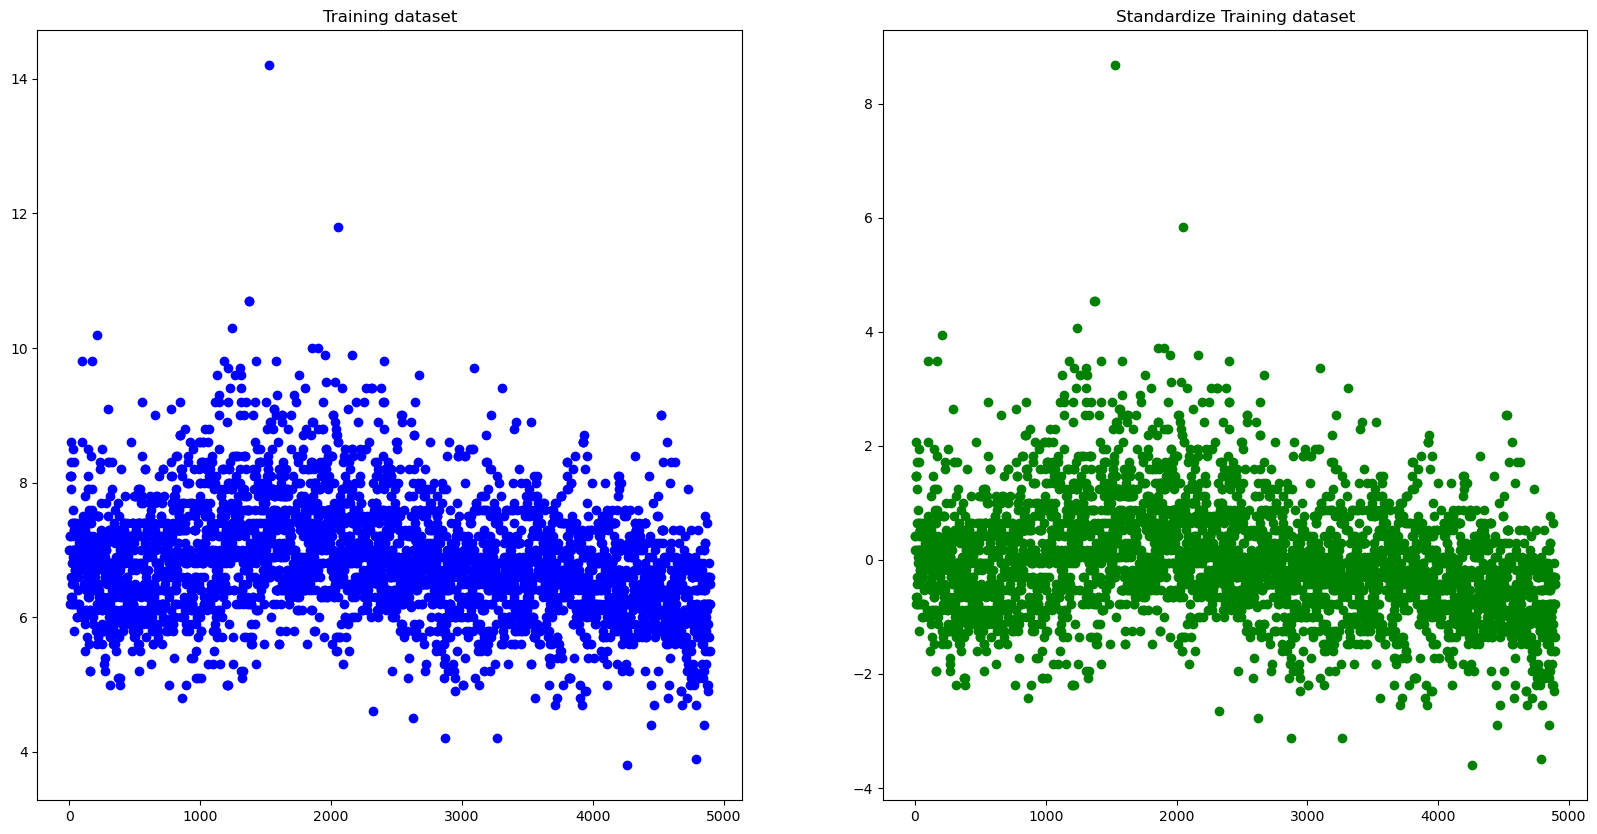

In [44]:
fig,(ax1,ax2)= plt.subplots(ncols=2,figsize=(20,10))
ax1.scatter(x_train.index,x_train['fixed acidity'],c='blue',label='raw')
ax2.scatter(x_train.index,x_train_new[:,0],c='green',label='raw')
ax1.set_title("Training dataset")
ax2.set_title("Standardize Training dataset")

Text(0.5, 1.0, 'Standardization')

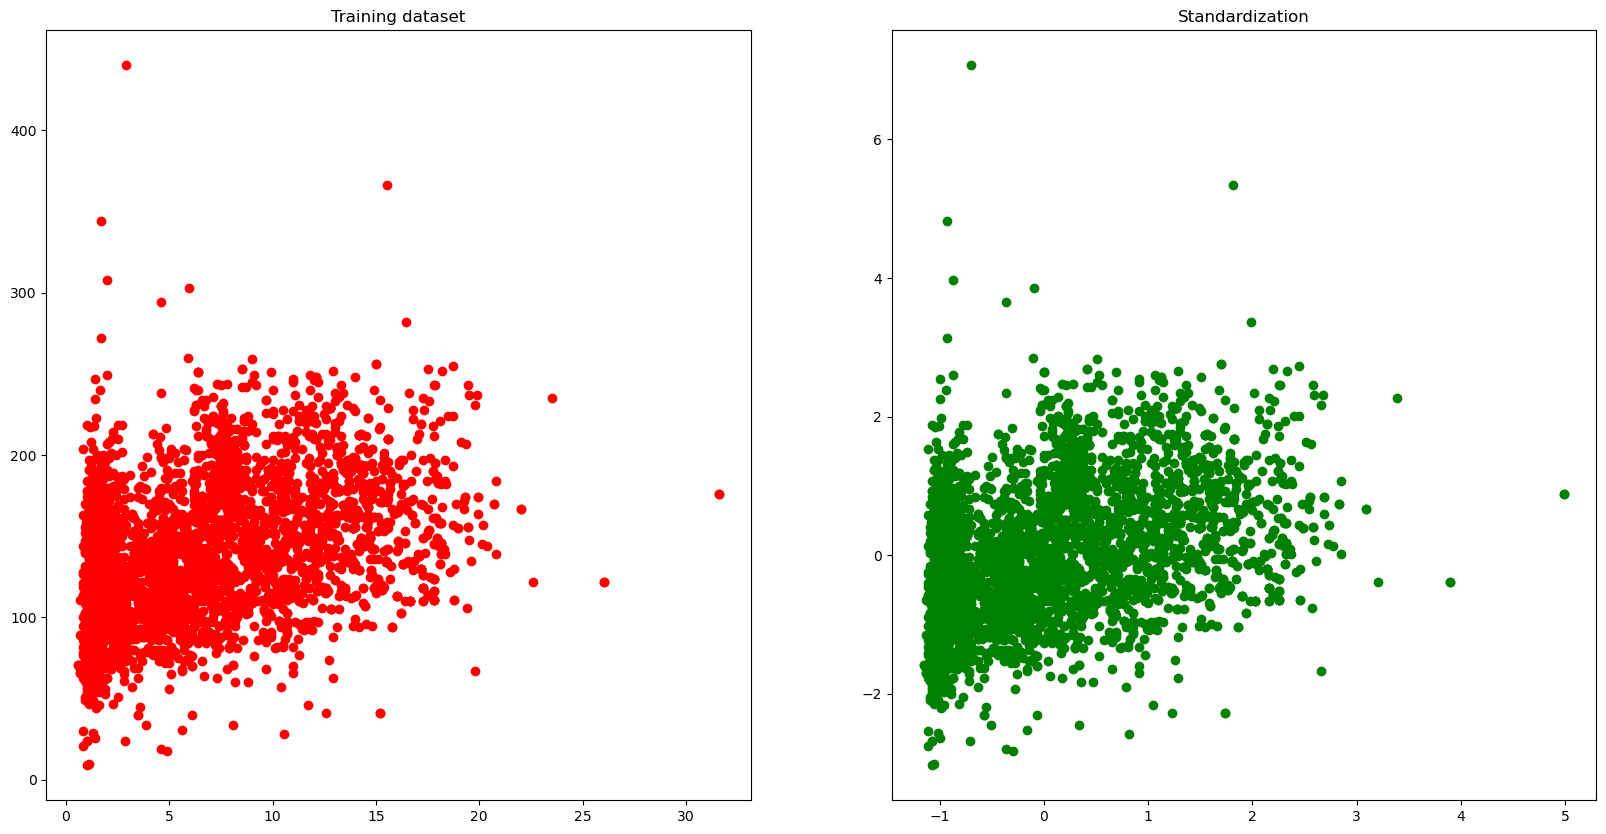

In [51]:
fig2,(ax_1,ax_2) = plt.subplots(ncols=2,figsize=(20,10))
ax_1.scatter(x_train['residual sugar'],x_train['total sulfur dioxide'],c='red')
ax_1.set_title('Training dataset')
ax_2.scatter(x_train_new[:,3],x_train_new[:,6],c='green')
ax_2.set_title('Standardization')

In [69]:
x_val_new = scaler.transform(x_val)
x_test_new = scaler.transform(x_test)

In [38]:
f= np.array([[1,2,3],[4,5,6]])
f[:,0]

array([1, 4])

In [71]:
epochs=30
def plot_learningCurve(history):
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['mae'])
    plt.plot(epoch_range,history.history['val_mae'])
    plt.title("Model mae")
    plt.xlabel('Epochs')
    plt.ylabel('Mae')
    plt.legend(['Train','Validation'],loc='upper right')
    plt.show()
    
    print("-----------------------------------------------------")
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'],loc='upper right')
    plt.show()

In [80]:
small_model=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,input_shape=(11,),activation='relu'),
    tf.keras.layers.Dense(units=1)
])
small_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                192       
                                                                 
 dense_13 (Dense)            (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [81]:
small_model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
history_small = small_model.fit(x_train_new,y_train,epochs=30,batch_size=32,validation_data=[x_val_new,y_val])

Epoch 1/30
124/124 [==============================] - 1s 2ms/step - loss: 5.0791 - mae: 5.0791 - val_loss: 4.0752 - val_mae: 4.0752
Epoch 2/30
124/124 [==============================] - 0s 1ms/step - loss: 3.1607 - mae: 3.1607 - val_loss: 2.4409 - val_mae: 2.4409
Epoch 3/30
124/124 [==============================] - 0s 1ms/step - loss: 1.9542 - mae: 1.9542 - val_loss: 1.6074 - val_mae: 1.6074
Epoch 4/30
124/124 [==============================] - 0s 1ms/step - loss: 1.4686 - mae: 1.4686 - val_loss: 1.3402 - val_mae: 1.3402
Epoch 5/30
124/124 [==============================] - 0s 1ms/step - loss: 1.2827 - mae: 1.2827 - val_loss: 1.2016 - val_mae: 1.2016
Epoch 6/30
124/124 [==============================] - 0s 1ms/step - loss: 1.1489 - mae: 1.1489 - val_loss: 1.0669 - val_mae: 1.0669
Epoch 7/30
124/124 [==============================] - 0s 1ms/step - loss: 1.0422 - mae: 1.0422 - val_loss: 0.9807 - val_mae: 0.9807
Epoch 8/30
124/124 [==============================] - 0s 1ms/step - loss: 0.

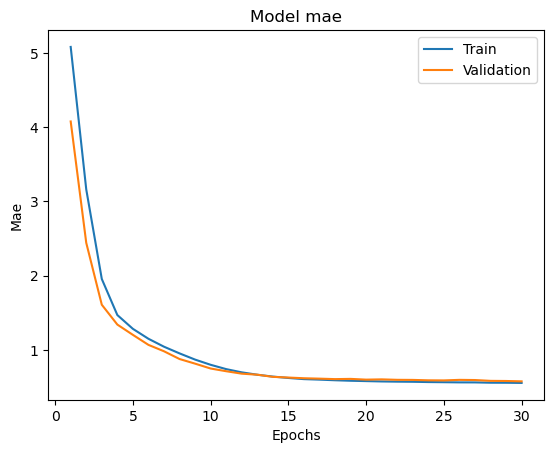

-----------------------------------------------------


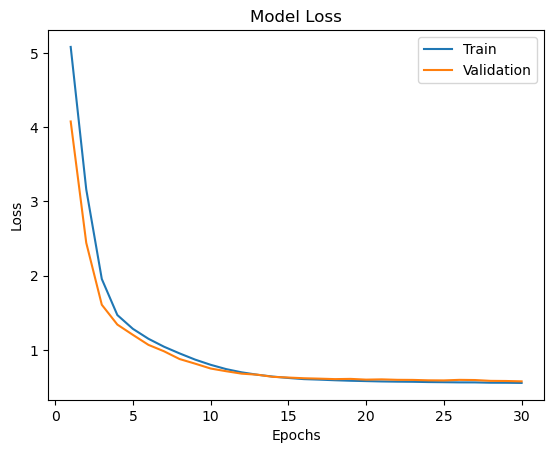

In [82]:
plot_learningCurve(history_small)

In [102]:
s_test_loss,s_test_mae = small_model.evaluate(x_test_new,y_test)

23/23 [==============================] - 0s 1ms/step - loss: 0.5768 - mae: 0.5768


In [103]:
print("small model test_loss : {}"
                .format(s_test_loss))
print("small model test_mae : {} "
                .format(s_test_mae))

small model test_loss : 0.5768314003944397
small model test_mae : 0.5768314003944397 


In [85]:
unseen_data = np.array([[6.0 , 0.28 , 0.22 , 12.15 ,
                           0.048 , 42.0 , 163.0 ,
                           0.99570 , 3.20 , 0.46 ,
                           10.1]])

In [108]:
y_small = small_model.predict(scaler.transform(unseen_data))
print ("Wine quality on unseen data (small model): ", y_small[0][0])

1/1 [==============================] - 0s 26ms/step
Wine quality on unseen data (small model):  5.333298


/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [96]:
medium_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64,activation='relu',input_shape=(11,)),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
medium_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 64)                768       
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [97]:
medium_model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])

In [98]:
medium_history = medium_model.fit(x_train_new,y_train,epochs=30,validation_data=[x_val_new,y_val],batch_size=32)

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 2.0892 - mae: 2.0892 - val_loss: 1.0567 - val_mae: 1.0567
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 0.9339 - mae: 0.9339 - val_loss: 0.7914 - val_mae: 0.7914
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.7102 - mae: 0.7102 - val_loss: 0.6692 - val_mae: 0.6692
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6116 - mae: 0.6116 - val_loss: 0.6131 - val_mae: 0.6131
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5747 - mae: 0.5747 - val_loss: 0.6242 - val_mae: 0.6242
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5620 - mae: 0.5620 - val_loss: 0.6002 - val_mae: 0.6002
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5505 - mae: 0.5505 - val_loss: 0.5469 - val_mae: 0.5469
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

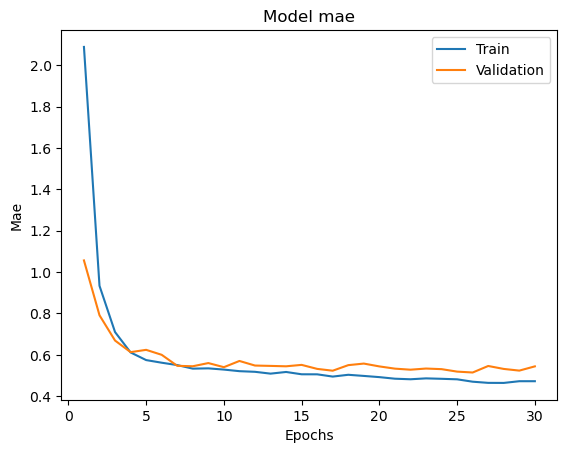

-----------------------------------------------------


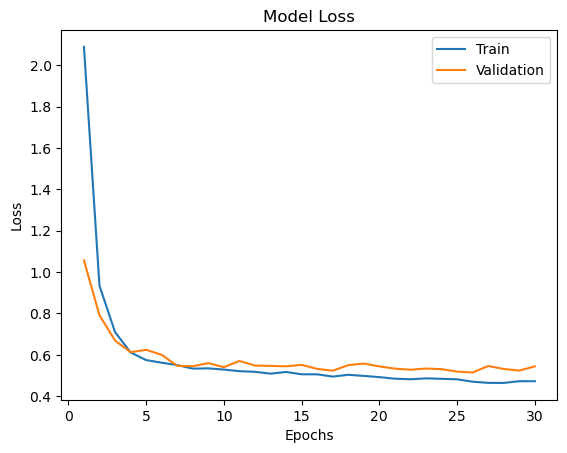

In [99]:
plot_learningCurve(medium_history)

In [121]:
m_test_loss,m_test_mae = medium_model.evaluate(x_test_new,y_test,batch_size=32)
print("small model test_loss : {}"
                .format(m_test_loss))
print("small model test_mae : {} "
                .format(m_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.5461 - mae: 0.5461
small model test_loss : 0.5461234450340271
small model test_mae : 0.5461234450340271 


In [109]:
y_medium= medium_model.predict(scaler.transform(unseen_data))
print ("Wine quality on unseen data (medium model): ", y_small[0][0])

1/1 [==============================] - 0s 27ms/step
Wine quality on unseen data (medium model):  5.333298


/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [129]:
large_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu',input_shape=(11,)),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
large_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 128)               1536      
                                                                 
 dense_39 (Dense)            (None, 128)               16512     
                                                                 
 dense_40 (Dense)            (None, 128)               16512     
                                                                 
 dense_41 (Dense)            (None, 128)               16512     
                                                                 
 dense_42 (Dense)            (None, 1)                 129       
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [130]:
large_model.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
large_history=large_model.fit(x_train_new,y_train,epochs=30,batch_size=32,validation_data=[x_val_new,y_val])

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.6194 - mae: 1.6194 - val_loss: 0.9848 - val_mae: 0.9848
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 0.7965 - mae: 0.7965 - val_loss: 0.6411 - val_mae: 0.6411
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6111 - mae: 0.6111 - val_loss: 0.6108 - val_mae: 0.6108
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5642 - mae: 0.5642 - val_loss: 0.5793 - val_mae: 0.5793
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5702 - mae: 0.5702 - val_loss: 0.6577 - val_mae: 0.6577
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5432 - mae: 0.5432 - val_loss: 0.5604 - val_mae: 0.5604
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5499 - mae: 0.5499 - val_loss: 0.6794 - val_mae: 0.6794
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

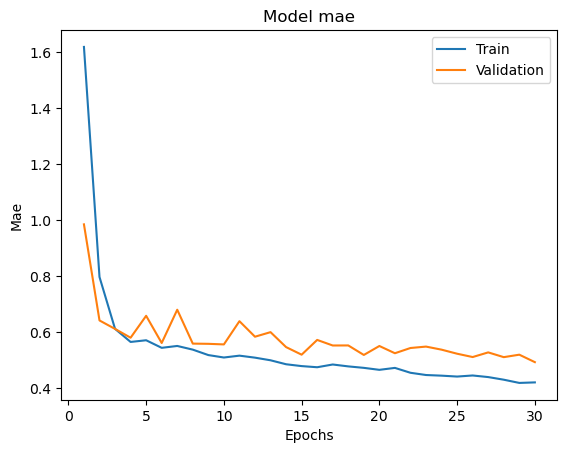

-----------------------------------------------------


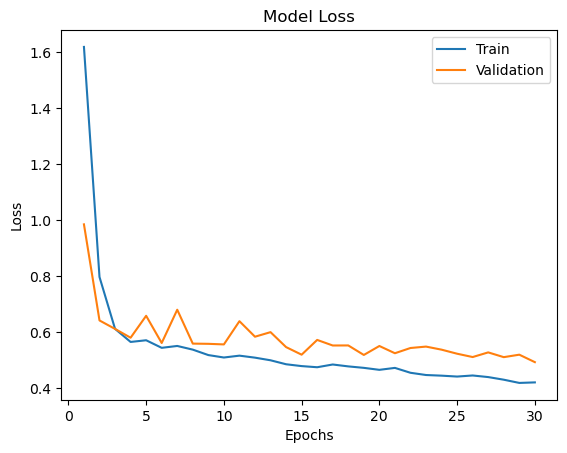

In [131]:
plot_learningCurve(large_history)

In [118]:

l_test_loss , l_test_mae = large_model.evaluate(x_test_new , y_test ,batch_size = 32 , verbose = 1)
print("large model test_loss : {}".format(l_test_loss))
print("large model test_mae : {}".format(l_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.5127 - mae: 0.5127
large model test_loss : 0.51268470287323
large model test_mae : 0.51268470287323


In [148]:
y_large = large_model.predict(scaler.transform(unseen_data))
print ("Wine quality on unseen data (large model): ",y_large[0][0])

1/1 [==============================] - 0s 23ms/step
Wine quality on unseen data (large model):  5.104947


/Users/ngounepeetprogress/opt/anaconda3/envs/deepL/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [135]:
large_model_overfit = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128,activation='relu',input_shape=(11,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(units=1)
])
large_model_overfit.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               1536      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 128)               16512     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_51 (Dense)            (None, 128)             

In [136]:
large_model_overfit.compile(loss='mae',optimizer=tf.keras.optimizers.Adam(),metrics=['mae'])
large_history_overfit=large_model_overfit.fit(x_train_new,y_train,epochs=30,batch_size=32,validation_data=[x_val_new,y_val])

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 1.7775 - mae: 1.7775 - val_loss: 1.3070 - val_mae: 1.3070
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 1.0064 - mae: 1.0064 - val_loss: 0.9420 - val_mae: 0.9420
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 0.7810 - mae: 0.7810 - val_loss: 0.6351 - val_mae: 0.6351
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6828 - mae: 0.6828 - val_loss: 0.6635 - val_mae: 0.6635
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6381 - mae: 0.6381 - val_loss: 0.6024 - val_mae: 0.6024
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6335 - mae: 0.6335 - val_loss: 0.5812 - val_mae: 0.5812
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6244 - mae: 0.6244 - val_loss: 0.5626 - val_mae: 0.5626
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

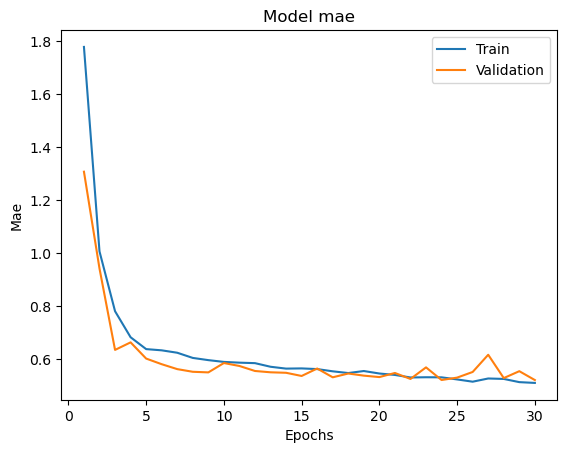

-----------------------------------------------------


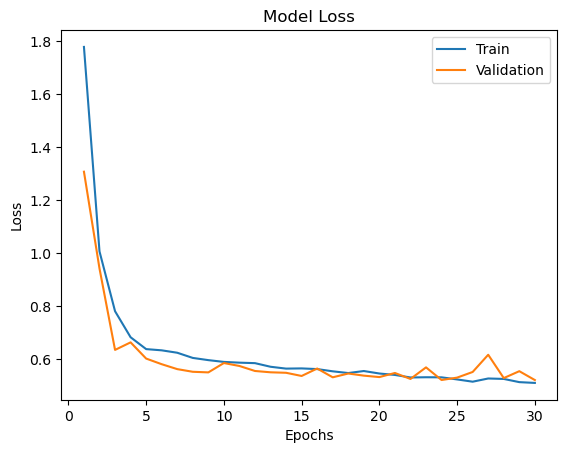

In [137]:
plot_learningCurve(large_history_overfit)

In [143]:
small_model_overfit=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,input_shape=(11,),activation='relu'),
    tf.keras.layers.Dense(units=1)
])
small_model_overfit.summary()
optimizer = tf.keras.optimizers.RMSprop(0.001)
small_model_overfit.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
history_small_overfit = small_model_overfit.fit(x_train_new,y_train,epochs=30,batch_size=32,validation_data=[x_val_new,y_val])

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 16)                192       
                                                                 
 dense_60 (Dense)            (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
124/124 [==============================] - 1s 2ms/step - loss: 21.5301 - mae: 4.4422 - val_loss: 12.8710 - val_mae: 3.3575
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 8.8463 - mae: 2.6224 - val_loss: 4.9136 - val_mae: 1.8193
Epoch 3/30
124/124 [==============================] - 0s 1ms/step - loss: 4.0798 - mae: 1.6247 - val_loss: 3.0123 - val_mae: 1.3645
Epoch 4/30
124/124 [==============================] -

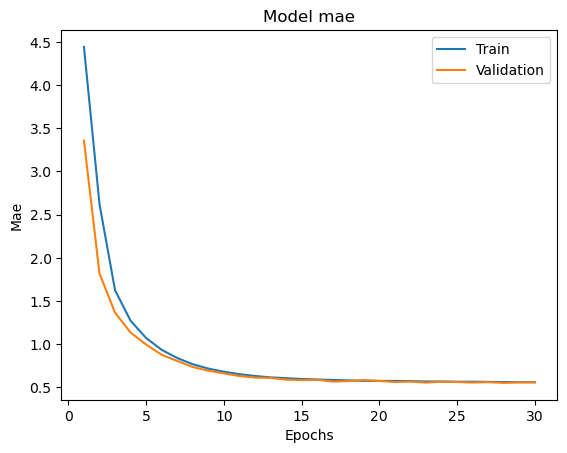

-----------------------------------------------------


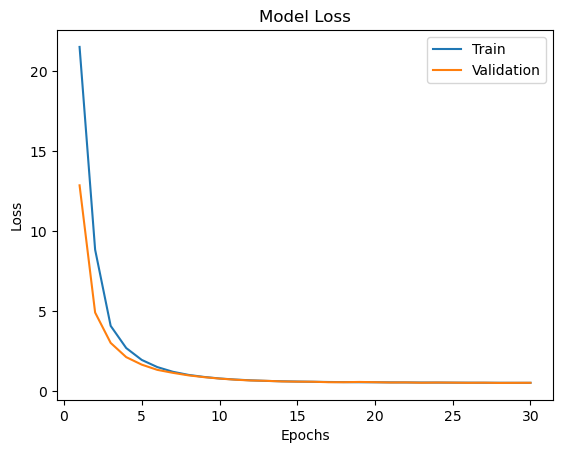

In [144]:
plot_learningCurve(history_small_overfit)

In [141]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)
small_model_overfit_early=tf.keras.Sequential([
    tf.keras.layers.Dense(units=16,input_shape=(11,),activation='relu'),
    tf.keras.layers.Dense(units=1)
])
small_model_overfit_early.summary()
optimizer = tf.keras.optimizers.RMSprop(0.001)
small_model_overfit_early.compile(loss='mae',optimizer=optimizer,metrics=['mae'])
history_small_overfit_early = small_model_overfit_early.fit(x_train_new,y_train,epochs=30,batch_size=32,validation_data=[x_val_new,y_val],callbacks=[early_stopping])

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 16)                192       
                                                                 
 dense_58 (Dense)            (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
124/124 [==============================] - 1s 2ms/step - loss: 4.9412 - mae: 4.9412 - val_loss: 3.9577 - val_mae: 3.9577
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 3.1485 - mae: 3.1485 - val_loss: 2.3682 - val_mae: 2.3682
Epoch 3/30
124/124 [==============================] - 0s 1ms/step - loss: 1.9461 - mae: 1.9461 - val_loss: 1.4949 - val_mae: 1.4949
Epoch 4/30
124/124 [==============================] - 0

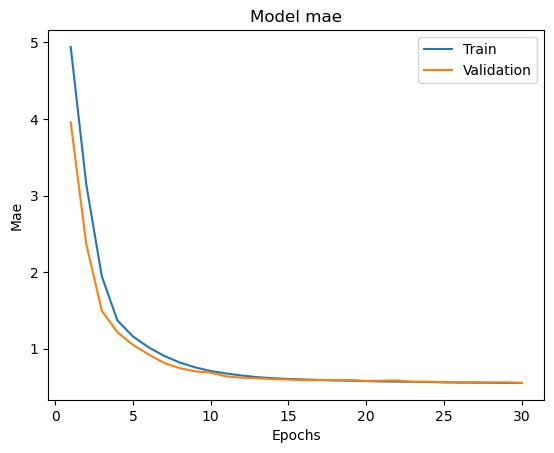

-----------------------------------------------------


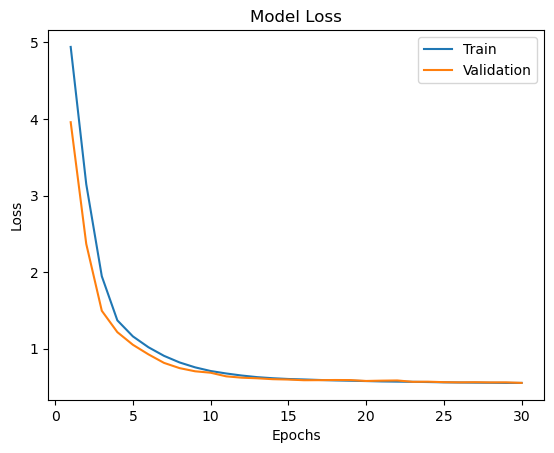

In [142]:
plot_learningCurve(history_small_overfit_early)

In [145]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
model.predict(np.array([[7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8]]))